##### Mitchell Scott (mtscot4)
##### Phys 731R: Random Matrix Theory
##### Prof. Ilya Nemenman
##### Spring 2024

# Homework 5

In [170]:
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from TracyWidom import TracyWidom
from matplotlib import cm, ticker

In [3]:
np.random.default_rng(12345)

Generator(PCG64) at 0x10F73C3C0

## Problem 11.4.2
### Consider $\mathbf{M}$ an invertible symmetric random matrix and $\mathbf{M}^{-1}$ its inverse. Using Eq. (11.89), show that $$\mathfrak{t}_{\mathbf{M}}(\zeta) + \mathfrak{t}_{\mathbf{M}^{-1}}\left(\frac{1}{\zeta}\right) + 1 = 0$$.

First, we observe that using Eq. 11.89, we see
\begin{align}
    \mathfrak{t}_{\mathbf{A}}(\xi) &= \sum_{k=0}^{\infty} \frac{m_k}{\xi^k}, \quad \text{ where } \quad m_k := \tau(\mathbf{A}^k)
\end{align}
Directly plugging it into our equation, we see:
\begin{align}
\mathfrak{t}_{\mathbf{M}}(\zeta) + \mathfrak{t}_{\mathbf{M}^{-1}}\left(\frac{1}{\zeta}\right) &= \sum_{k=0}^{\infty} \frac{m^{\mathbf{M}}_k}{\zeta^k} + \sum_{k=0}^{\infty} \zeta^km^{\mathbf{M}^{-1}}_k
\end{align}

Now we can observe that since $\mathbf{M}$ is invertible and symmetric, we know that there exists a spectral decomposition $\mathbf{M} = \mathbf{PDP}^\top$, where $\mathbf{P}^{-1} = \mathbf{P}^\top$, as it is orthogonal. This means $\tau(\mathbf{M}) = \frac{1}{N}\text{tr}\mathbf{M} = \frac{1}{N}\text{tr}\mathbf{PDP}^\top = \frac{1}{N}\text{tr}\mathbf{P}^\top\mathbf{PD} = \frac{1}{N}\text{tr}\mathbf{D}$. Now using the fact that $\mathbf{M}^{-1} = \mathbf{PD}^{-1}\mathbf{P}^\top$, and the same logic as above, we see $\tau(\mathbf{M}^{-1}) = \frac{1}{N}\text{tr}\mathbf{D}^{-1}$. Lastly, because we are working with $\text{tr}\mathbf{M}^k$, the spectral decomposition makes it easy to see that $\text{tr}\mathbf{M}^k = \text{tr}\mathbf{D}^k$. Notice I didn't forget about the expectation, but since it is just one random object taht we selected, we fix $\mathbf{M}$ so it is deterministic.

This sets us up nicely to see:
\begin{align}
\mathfrak{t}_{\mathbf{M}}(\zeta) + \mathfrak{t}_{\mathbf{M}^{-1}}\left(\frac{1}{\zeta}\right) +1 &= \sum_{k=0}^{\infty} \frac{m^{\mathbf{M}}_k}{\zeta^k} + \sum_{k=0}^{\infty} \zeta^km^{\mathbf{M}^{-1}}_k +1 \\
&= \sum_{k=0}^{\infty} \frac{\text{tr}\mathbf{D}^k}{\zeta^k} + \frac{\zeta^k}{\text{tr}\mathbf{D}^k} + 1\\
&= 0
\end{align}
so we are done.

### Using Eq. (11.115), show that $$S_{\mathbf{M}^{-1}}(x) = \frac{1}{S_{\mathbf{M}}(-x-1)}.$$ Hint: write $u(x) = 1/\zeta(t)$ where $u(x)$ is such that $x=\mathfrak{t}_{\mathbf{M}^{-1}}(u(x)).$ Equation (11.115) is then equivalent to $x=-1-t.$

Using the hint provided, we see that $x = \mathfrak{t}_{\mathbf{M}^{-1}}(u(x))$, where $u(x) = \frac{1}{\zeta(t)}$, so we have that the above equation is equivalent to $x = -1-t$. Also recal that $\zeta_{\mathbf{M}^{-1}}(t)$ is the functional inverse of $\mathfrak{t}_{\mathbf{M}^{-1}}(t)$. This means $\frac{1}{x} = \zeta_{\mathbf{M}^{-1}}(t)$.

Now using the definition of the S-transform in relation to the T-transform, we see
\begin{align}
S_{\mathbf{M}^{-1}}(x) &= \frac{x+1}{x\zeta_{\mathbf{M}^{-1}}(t)}\\
&= \frac{x+1}{x\frac{1}{x}}\\
&= x+ 1\\
&= -t \\
&= \frac{1}{S_\mathbf{M}(-x-1)}.
\end{align}

The last step is just the definition of the S-Transform for our problem. Therefore, we have shown what we wanted.

## Problem 12.5.2
#### A rotationally invariant $2\times 2$ matrix with deterministinc eigenvalues 0 and $a_1\geq 0$ has the form $$A_1 = \mathbf{O}\begin{pmatrix}0&0\\0&a_1\end{pmatrix}\mathbf{O}^\top.$$ Two such matrices are free so we can use the S-transform to compute the eigenvalue distribution of their product.

### Show that the T-transform and the S-transform of $\mathbf{A}_1$ are given by $$ \mathfrak{t}(\zeta) = \frac{a_1}{2\left(\zeta - a_1\right)} \text{ and } S(t) = \frac{2}{a_i}\frac{t+1}{2t+1}.$$

First we notice that $\mathfrak{t}_{\mathbf{A}}(\zeta) = \tau\left[\mathbf{A}\left(\zeta - \mathbf{A}\right)^{-1}\right] = \zeta\mathfrak{g}_{\mathbf{A}}(\zeta)-1 = \sum_{k=1}^{\infty}\frac{\tau\left(\mathbf{A}^k\right)}{\zeta^k}$. Also we recognize that $\tau\left(\mathbf{A}^k\right) = \frac{1}{N}\text{tr}(\mathbf{A}^k)$, but for our specific problem, we have $N=2, \text{tr}(\mathbf{A}^k) = a_1^k$. This means
\begin{align}
\mathfrak{t}_{\mathbf{A}_1}(\zeta) &= \zeta\sum_{k=0}^\infty\frac{\tau\left(\mathbf{A}_1^k\right)}{\zeta^{k+1}} - 1\\
&= \frac{1}{2}\sum_{k=0}^\infty \left(\frac{a_1^k}{\zeta^k}\right) - 1\\
&= \frac{1}{2}\frac{1}{1-\frac{a_1}{\zeta}} - 1\\
&= \frac{a_1}{2(\zeta-a_1)},
\end{align}
where we used the geometric series formula.

Now recall that $S_\mathbf{A}(t) = \frac{t+1}{t\zeta_\mathbf{A}(t)}$, but we just solved for $\mathfrak{t}(\zeta)$, which is the functional inverse of $\zeta(t)$, so we see
\begin{align}
t = \frac{a_1}{2(\zeta-a_1)} &\implies (\zeta - a_1) = \frac{a_1}{2t}\\
&\implies \zeta(t) = \frac{a_1}{2t} + a_1.
\end{align}

Plugging that into the S-transform formula, we see:
\begin{align}
S_\mathbf{A}(t) &= \frac{\frac{a_1}{2(\zeta-_1)}+1}{t\left(\frac{a_1}{2t} + a_1\right)}\\
&= \frac{t+1}{\frac{a_1}{2} + a_1t}\\
&= \frac{2(t+1)}{a_1+2a_1t}\\
&=\frac{2}{a_1}\frac{t+1}{2t+1}
\end{align}

### Consider another such matrix $\mathbf{A}_2$ with independent eigenvectors and non-zero eigenvalue $a_2$. Using the multiplicity of the S-transform, show that the T-transform and the density of eigenvalues of $\sqrt{\mathbf{A}_1}\mathbf{A}_2 \sqrt{\mathbf{A}_1}$ are given by $$ \mathfrak{t}_{\mathbf{A}_1\mathbf{A}_2} = \frac{1}{2} - \frac{1}{2}\sqrt{\frac{\zeta}{\zeta - a_1a_2}}$$ and $$\rho_{\mathbf{A}_1\mathbf{A}_2}(\lambda) = \frac{1}{2}\delta(\lambda) + \frac{1}{2\pi\sqrt{\lambda\left(a_1a_2 - \lambda\right)}} \text{ for } 0\leq \lambda \leq a_1a_2,$$ where the delta function in the density indicates the fact that one eigenvalue is always zero.

First, observe that there is nothing "special" about the matrix $\mathbf{A}$ other than it having one nonzero eigenvalue, so we can apply the S-transform to the matrices $\sqrt{\mathbf{A}_1}$, or $\mathbf{A}_2$, as it is defined above, so using the mutiplicativity of the S-transform and commutativity of scalar multiplication, we obseve
\begin{align}
S_{\mathbf{A}_1\mathbf{A}_2}(t) &= S_{\sqrt{\mathbf{A}_1}\sqrt{\mathbf{A}_1}\mathbf{A}_2}(t)\\
&= S_{\sqrt{\mathbf{A}_1}}(t)S_{\sqrt{\mathbf{A}_1}}(t)S_{\mathbf{A}_2}(t)\\
&= S_{\sqrt{\mathbf{A}_1}}(t)S_{\mathbf{A}_2}(t)S_{\sqrt{\mathbf{A}_1}}(t)\\
&= S_{\sqrt{\mathbf{A}_1}\mathbf{A}_2\sqrt{\mathbf{A}_1}}(t)
\end{align}

Now since $S_{\mathbf{A}_1}(t) = \frac{2}{a_1}\frac{t+1}{2t+1}$, we also have $S_{\sqrt{\mathbf{A}_1}}(t) = \frac{2}{\sqrt{a_1}}\frac{t+1}{2t+1}$, and $S_{\mathbf{A}_2}(t) = \frac{2}{a_2}\frac{t+1}{2t+1}$, so
\begin{align}
S_{\mathbf{A}_1\mathbf{A}_2}(t) &= \frac{2}{a_1}\frac{t+1}{2t+1}\frac{2}{a_2}\frac{t+1}{2t+1}\\
&= \frac{4}{a_1a_2}\left(\frac{t+1}{2t+1}\right)^2\\
&= \frac{t+1}{t\zeta_{\mathbf{A}_1\mathbf{A}_2}(t)},
\end{align}

by the definition of the S-Transform, and when we solve for $\zeta_{\mathbf{A}_1\mathbf{A}_2}(t)$, which is the functional inverse of $\mathfrak{t}_{\mathbf{A}_1\mathbf{A}_2}(\zeta)$, we compute
\begin{align}
\zeta_{\mathbf{A}_1\mathbf{A}_2}(t) &= \frac{a_1a_2(2t+a)^2}{4t(t+1)}.
\end{align}

Now using Wolfram Alpha to solve for this inverse function $t_{\mathbf{A}_1\mathbf{A}_2}(\zeta)$, we get
\begin{align}
t_{\mathbf{A}_1\mathbf{A}_2}(\zeta) &= \frac{-a_1a_2 + \zeta \pm \sqrt{\zeta(\zeta-a_1a_2)}}{-2(\zeta-a_1a_2)}\\
&= \frac{1}{2} - \frac{1}{2}\sqrt{\frac{\zeta(\zeta-a_1a_2)}{(\zeta-a_1a_2)^2}}\\
&= \frac{1}{2} - \frac{1}{2}\sqrt{\frac{\zeta}{(\zeta-a_1a_2)}},
\end{align}

as desired. Now we use this result and the Sokhotski-Plemelj formula to derive the density from the T-transform.
\begin{align}
\rho_{\mathbf{A}_1\mathbf{A}_2}(\lambda) &= \lim_{\eta\to0^+}\frac{\Im \mathfrak{t}_{\mathbf{A}_1\mathbf{A}_2}(\lambda - i\eta)}{\pi\lambda}\\
&= \frac{1}{2}\delta(\lambda) + \frac{1}{2\pi\sqrt{\lambda(a_1a_2-\lambda)}},
\end{align}
where the computation was carried out using Wolfram-Alpha.

### By directly computing the matrix product in the basis where $\mathbf{A}_1$ is diagonal, show that, in that basis, $$ \sqrt{\mathbf{A}_1}\mathbf{A}_2\sqrt{\mathbf{A}_1} = a_1a_2\begin{pmatrix}0&0\\0&1-\cos 2\theta\end{pmatrix},$$ where $\theta$ is a random angle distributed between 0 and $2\pi$. 
Let
\begin{align}
\mathbf{A}_1 &= \mathbf{D}_1\\
&= \begin{pmatrix} 0&0\\0&a_1\end{pmatrix}\\
\sqrt{\mathbf{A}_1} &= \sqrt{\mathbf{D}_1}\\
&= \begin{pmatrix} 0&0\\0&\sqrt{a_1}\end{pmatrix}\\
\mathbf{A}_2 &= \mathbf{OD}_2\mathbf{O}^\top\\
&= \begin{pmatrix} \cos\theta&\sin\theta\\-\sin\theta&\cos\theta\end{pmatrix}\begin{pmatrix} a_2&0\\0&0\end{pmatrix}\begin{pmatrix} \cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{pmatrix}.
\end{align}
You might wonder why $a_2$ is in the 1,1 entry, and not 2,2, but we are allowed to do this as those two matrices are a permutation of each other, and we are averaging over all possible rotations. It does make the math easier.

Combining these we get
\begin{align}
\sqrt{\mathbf{A}_1}\mathbf{A}_2 \sqrt{\mathbf{A}_1} &= \begin{pmatrix} 0&0\\0&\sqrt{a_1}\end{pmatrix} \begin{pmatrix} \cos\theta&\sin\theta\\-\sin\theta&\cos\theta\end{pmatrix}\begin{pmatrix} a_2&0\\0&0\end{pmatrix}\begin{pmatrix} \cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{pmatrix}\begin{pmatrix} 0&0\\0&\sqrt{a_1}\end{pmatrix}\\
&= \begin{pmatrix} 0&0\\-\sqrt{a_1}\sin\theta&\sqrt{a_1}\cos\theta\end{pmatrix}\begin{pmatrix} a_2&0\\0&\end{pmatrix}\begin{pmatrix} 0&-\sqrt{a_1}\sin\theta\\0&\sqrt{a_1}\cos\theta\end{pmatrix}\\
&= a_1a_2\begin{pmatrix}0&0\\0&\sin^2\theta\end{pmatrix}\\
&= 2a_1a_2\begin{pmatrix}0&0\\0&1-\cos 2\theta\end{pmatrix}
\end{align}

### Show that the distribution of the non-zero eigenvalue implied by (b) and (c) is the same. It is the shifted arcsine law. 

We observe that the inverse of $\sin^2(x)$ is $\arcsin(\sqrt{x})$, and by the trigonometric identity we employed above, this tells us the the CDF is $\arcsin(\sqrt{x})$, which is related to the inverse of the function for the nonzero eigenvalue, we arrive at the shifted arcsine distribution, which has PDF which is the derivative of the CDF, which is proportional to $\frac{1}{2\pi\sqrt{\lambda(a_1a_2-\lambda)}}$, which is the same distribution of the shifted arcsine law we saw in part (b).

## Problem 14.2.1
#### Define a modified Wishart matrix $\mathbf{W}_1$ such that every element $\left(\mathbf{W}_1\right)_{ij} = \mathbf{W}_{ij} + a/N$, where $\mathbf{W}$ is a standard Wishart matrix and $a$ is a constant of order 1. $\mathbf{W}_1$ is a standard Wishart matrix plus a rank-1 perturbation $\mathbf{W}_1 = \mathbf{W} + a\mathbf{uu}^\top$.

### What is the normalized vector $\mathbf{u}$ in this case?

Since we have $\frac{a}{N}$ being applied to each element of the original Wishart matrix, we need to think of how to get a $\mathbf{u}\in\mathbb{R}^N$ such that $\mathbf{uu}^\top$ is the all ones matrix, $\mathbf{1}$. This is possible if $\mathbf{u}$ is the all ones vector, or $\mathbf{u} = \vec{1}$. However, we do have the constraint that $\mathbf{u}$ needs to be normalized, so $\|\mathbf{u}\|_2 = 1$, which is possible if we include the normalization constant $\frac{1}{\sqrt{N}}$. Since there are $N$ elements of $\mathbf{u}$, which are all 1's, then 
\begin{align}
1 &= \|\mathbf{u}\|_2^2\\
&= \frac{1}{\sqrt{N}} \vec{1}^\top \left(\frac{1}{\sqrt{N}} \vec{1}\right)\\
&= \frac{1}{N} N
\end{align}

Putting this together, we observe that if $\mathbf{u} := \frac{1}{\sqrt{N}}\vec{1}$
\begin{align}
    \mathbf{W}_1 &= \mathbf{W} + a\mathbf{uu}^\top\\
    &= \mathbf{W} + a \frac{1}{\sqrt{N}}\vec{1}\frac{1}{\sqrt{N}}\vec{1}^\top\\
    &= \mathbf{W} + a \frac{1}{N} \mathbf{1}\\
    \left(\mathbf{W}_1\right)_{ij} &= \left(\mathbf{W}\right)_{ij} + \frac{a}{N}
\end{align}

### Using Eq. (14.14) and (10.15) find the value of the outlier and the minimal $a$ in the Wishart case.
We are told that
\begin{align}
\lambda_1 &= R\left(\frac{1}{a}\right) + a \qquad \text{ for } \qquad a>a^\ast = \frac{1}{g_+}.
\end{align}
However, for the Wishart case, we have an explicit formula for the R-transform, which is:
\begin{align}
R(x) &= \frac{1}{1-qx}\\
R\left(\frac{1}{a}\right) &= \frac{1}{1-\frac{q}{a}}\\
&= \frac{a}{a-q}
\end{align}

Now, we have 
\begin{align}
\lambda_1 &= R\left(\frac{1}{a}\right) + a \\
&= \frac{a}{a-q} + \frac{a(a-q)}{a-q}\\
&= \frac{a^2 + a(1-q)}{a-q}.
\end{align}

This is only true for $a>a^\ast$, so let's find that value. We know that 
\begin{align}
    \frac{d \mathfrak{z}(g)}{d g}\Bigg|_{g_+} &= 0 \qquad \text{ for } \qquad \mathfrak{z}(g_+) = \lambda_+
\end{align}
Luckily we have an explicit formula for $\mathfrak{z}(g)$ for the Wishart case, which is 
\begin{align}
\mathfrak{z}(g) &= \frac{1}{1-qg} + \frac{1}{g}\\
\frac{d \mathfrak{z}(g_+)}{d g_+} &= \frac{q}{(1-qg_+)^2} + \frac{1}{g_+^2} = 0.
\end{align}

Solving for $g_+$, we have
\begin{align}
g_+ &= \frac{1}{\sqrt{q} + q}\\
\frac{1}{g_+} &= \sqrt{q} + q\\
&= a^\ast.
\end{align}

This means any rank-1 perturbation of magnitude $a$ that is greater than $\sqrt{q} + q$, we know $\lambda_1$ will show up as an outlier.

Quickly, we do a sanity check that $\lambda_1 = \lambda_+ = (1+\sqrt{q})^2$, as we already derived for the Wishart distribution.
\begin{align}
\lambda_1 &= R\left(g_+\right) + \frac{1}{g_+}\\
&= \frac{1}{1-\frac{q}{\sqrt{q} + q}} + \sqrt{q} + q\\
&=\frac{\sqrt{q} + q}{\sqrt{q} + q - q} + \sqrt{q} + q\\
&= \frac{\sqrt{q} + q}{\sqrt{q}} + \sqrt{q} + q\\
&= 1 + 2\sqrt{q} + q\\
&= \left(1+\sqrt{q}\right)^2\\
&=: \lambda_+,
\end{align}

which was the right edge of the Marchenko-Pastur distribution, so we are self-consistent.

### The square-overlap between the vector $\mathbf{u}$ and the new eigenvector $\mathbf{v}_1$ is given by Eq. (14.26). Give an explicit expression in the Wishart case.

From the Eq. (14.26), we have
\begin{align}
|\mathbf{v}_1^\top\mathbf{u}|^2 &= 1 - a^{-2}R'(a^{-1})\\
&= 1 - a^{-2} \frac{q}{(1-\frac{q}{a})^2}\\
&= 1 - \frac{q}{(a-q)^2}
\end{align}

### Generate a large modified Wishart $(q=1/4, N=1000)$ for a few $a$ in the range $[1,5]$. Compute the largest eigenvalue $\lambda_1$ and associated eigenvector $\mathbf{v}_1$. Plot $\lambda_1$ and $|\mathbf{v}_1^\top\mathbf{u}|^2$ as a function of $a$ and compare with the predicitons of (b) and (c).

In [196]:
# q = 0.25
N = 1000
T = 4000
trials = 500

a = np.random.uniform(low=1.0, high=5.0, size=(trials,1))


evals = np.zeros((trials,1))
u = 1/np.sqrt(N) * np.ones((N,1))
iprod = np.zeros((trials,1))

for i in range(trials):
    H = np.matlib.randn(N,T)
    A = 1/T * (H * H.T) + 1/N * np.multiply(a[i], np.matlib.ones((N,N)))
    eigenvalues, evecs = LA.eigh(A)
    evals[i] = eigenvalues[0]
    iprod[i] = np.absolute(evecs[:,0].T* u) ** 2


/var/folders/4d/q2khwlh50knb0r9mvbhlh4040000gn/T/ipykernel_23035/1053969177.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(evals, iprod, c = colors, cmap = cmap)


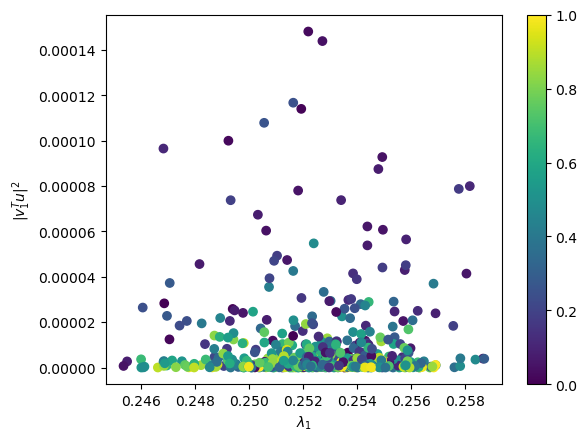

In [197]:
cmap = plt.get_cmap('viridis')
colors = cmap((a - a.min()) / a.ptp())

plt.scatter(evals, iprod, c = colors, cmap = cmap)
plt.colorbar()
plt.xlabel('$λ_1$')
plt.ylabel('$|v_1^T u|^2$')
plt.show()

Using the models that we computed above for $\lambda_1, |\mathbf{v}_1^\top\mathbf{u}|^2$, and the fact that we have chosen $a = [1,5]$, we compute that the experiments above should have the following statistics:

For $a = 1$:
\begin{align}
\lambda_1 &\approx \frac{7}{3}\\
|\mathbf{v}_1^\top\mathbf{u}|^2 &\approx \frac{5}{4}.
\end{align}

For $a = 5$:
\begin{align}
\lambda_1 &\approx 6.0526\\
|\mathbf{v}_1^\top\mathbf{u}|^2 &\approx 0.98892
\end{align}

We then run the experiment and see a scatter plot of $\lambda_1$ vs. $|\mathbf{v}_1^\top\mathbf{u}|^2$ for 500 different $a$ values from $a=[1,5]$ chosen uniformly. The color bar and color of each scatter point is normalized so that the smallest $a$ value is 0.0 on the color bar and the largest $a$ value is 1.0 on the colorbar. We can think of the color of the scatter point as a percentile. Additionally, for our example $a_{\text{min}} = 1.00823014, a_{\text{max}} = 4.99529908$.

We see from the experimental results above that all of the $\lambda_1 \in [0.246, 0.260]$, which agrees with the above results. However, we observe that the lower bound of $\lambda_1 \approx \frac{7}{3} = 2.\bar{3}$ is a much tighter bound then the upper bound of the 6.0526. My guess is that while a value like that is possible, it is extremely unlikely. 

Additionally, the results for the numerics seem to different from the analysis of the problem in terms of the square overlap. We are numerically seeing results between 0.00 and 0.00014. This doesn't match with the theory where we see values that are 1.25 to 0.99. This might mean that the low rank noise we are adding isn't large enough to start to see the increase in the overlap,$|\mathbf{v}_1^\top\mathbf{u}|^2$, or $a\not> a^\ast$. This sort of behavior is seen in Fig (14.5) of the textbook, where if the perturbation is too small ($0\leq a\leq 1$), then the overlap tends to stay relatively close to zero.

The last thing that I want to note is the color coordination of the plot. The only scatter plot values that have larger overlap (given similar eigenvalues) are those dots that are purple in color, which corresponds to the smaller values of $a\approx 1$. This is interesting because I feel that it should be the opposite that as $a$ increases, the overlap also increases, but in fact, we see that when $a\to 5$, the overlap is essentially zero.

## Working with large ($N\sim100$) Wigner matrices, diagonalize them numerically, and histogram the distribution of the largest eigenvalue. Show that you get the Tracy-Widom result.

I wanted to acknoweldge that I am using a python package for the Tracy Widom distribution from [this github repository](https://github.com/yymao/TracyWidom). I tried to code my own Tracy-Widom distribution using the asymptotics of $\mathcal{O}(N^{-3/2})$ and $\mathcal{O}(N^{-3})$ as $x\to +\infty$ and $-\infty$, respectively. however, this proved harder than expected.

To show that this package works, I have plotted the distribution for $\beta = 1,2,4$ so that we can visualize the whole distribution.

In [188]:
x = np.linspace(1.5, 2.5, 1001)

tw1 = TracyWidom(beta=1)  # allowed beta values are 1, 2, and 4
pdf1 = tw1.pdf(x)
cdf1 = tw1.cdf(x)

tw2 = TracyWidom(beta=2)  
pdf2 = tw2.pdf(x)
cdf2 = tw2.cdf(x)

tw4 = TracyWidom(beta=4)  
pdf4 = tw4.pdf(x)
cdf4 = tw4.cdf(x)


r = np.random.rand(1000)
tw1_sample = tw1.cdfinv(r)
tw2_sample = tw2.cdfinv(r)
tw4_sample = tw4.cdfinv(r)

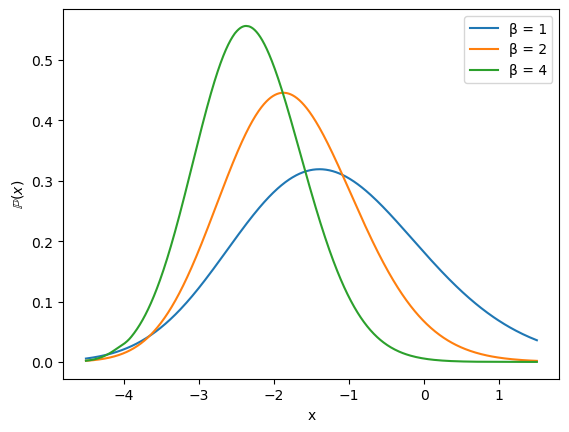

In [198]:
xall = np.linspace(-4.5, 1.5, 10001)
pdf1a = tw1.pdf(xall)
pdf2a = tw2.pdf(xall)
pdf4a = tw4.pdf(xall)
plt.plot(xall,pdf1a, label = 'β = 1')
plt.plot(xall,pdf2a, label = 'β = 2')
plt.plot(xall,pdf4a, label = 'β = 4')
plt.xlabel('x')
plt.ylabel('$\mathbb{P}(x)$')
plt.legend()
plt.show()

Now that we are satisfied that this is the T-W distribution, we begin the experiment for $N=100$, where we repeat it for 10,000 trials. Initially we set $\sigma = 1$ to observe that we see a small amount of the eigenvalues are larger than 2 (green line on far right), which is theoretically impossible since we are modelling the Wigner matrices, that has spectra, $\lambda_i \in [-2,2]$. This tells us that there is some noise in the model. However, comparing it to the T-W distribution plotted below, I don't know if we can say that the $\lambda_{\text{max}}\approx 2.05$ is a signal or not. The T-W at that point is about 0.02, so it might be able to be classified as noise, or a true signal, but there is not a true signal that was added to the model, so I don't know how to analyze that.

In [206]:
n = 100
sigma = 1
trials = 10000
eigMax = np.matlib.zeros(trials)

for i in range(trials):
    H = np.matlib.randn(n,n)
    X = sigma * (H + H.T) / np.sqrt(2*n)
    eigA = LA.eigvalsh(X, UPLO='U')
    eigMax[0,i] = eigA[-1]

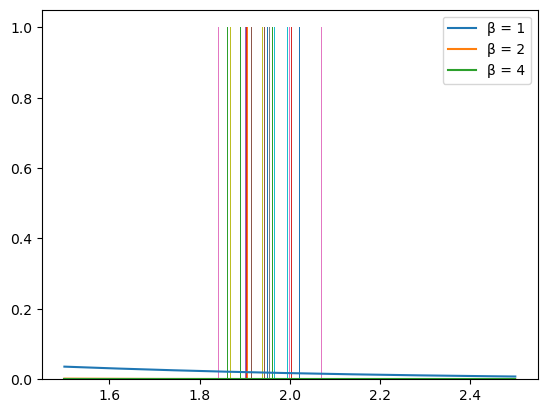

In [212]:
plt.hist(eigMax)
plt.plot(x,pdf1, label = 'β = 1')
plt.plot(x,pdf2, label = 'β = 2')
plt.plot(x,pdf4, label = 'β = 4')
plt.legend()
plt.show() 

In [215]:
n = 100
eigMax2 = np.matlib.zeros(trials)
sigma = 1.1

for i in range(trials):
    H = np.matlib.randn(n,n)
    X = sigma * (H + H.T) / np.sqrt(2*n)
    eigA = LA.eigvalsh(X, UPLO='U')
    eigMax2[0,i] = eigA[-1]

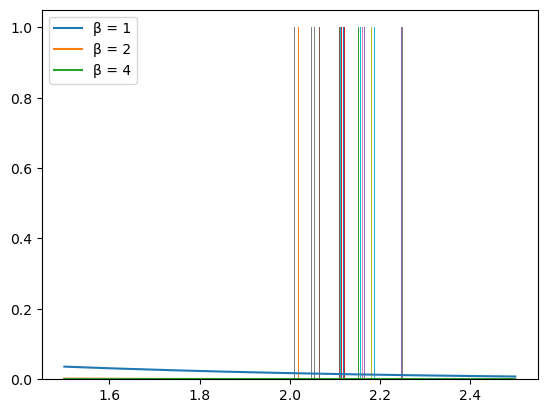

In [216]:
xmod = np.linspace(1.5, 2.5, 1001)
pdf1m = tw1.pdf(xmod)
pdf2m = tw2.pdf(xmod)
pdf4m = tw4.pdf(xmod)
plt.hist(eigMax2)
plt.plot(xmod,pdf1m, label = 'β = 1')
plt.plot(xmod,pdf2m, label = 'β = 2')
plt.plot(xmod,pdf4m, label = 'β = 4')
plt.legend()
plt.show() 

I repeated the above experiment with $\sigma = 1.1$, which of course changes the Wigner semi-circle law to have a max $\lambda\in[-2.2,2.2]$. Similarly to the last time we see a group of eigenvalues that are larger than the theoretical bound, but again, comparing it to the T-W distribution, I don't know what we can say. It looks pretty different, and relatively larger than the other max eigenvalues, but the T-W distribution says about 0.01 at that value of around 2.25. I think we might be able to consider this as a signal, but I don't know where the signal is coming from.